In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [6]:
# Load the stock prices dataset
stock_df = pd.read_csv(r"C:\Users\poorn\Downloads\stock prices.csv\stock prices.csv")

In [9]:
# Load Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
y = data['target']

In [10]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

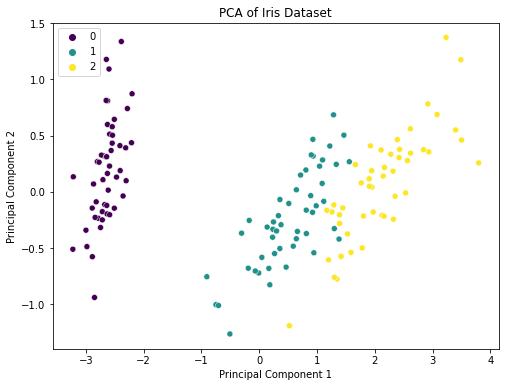

In [11]:
# Scatter plot for PCA reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [12]:
# Part 2: Stock Price Prediction Using Time Series Forecasting
# Convert Date column to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.set_index('Date', inplace=True)

In [13]:
# Handle missing values
stock_df.fillna(method='ffill', inplace=True)


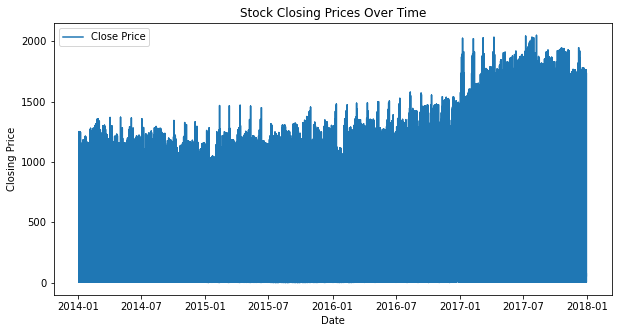

In [14]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
plt.plot(stock_df['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [15]:
# Feature Engineering: Lag and Moving Average
stock_df['Prev_Close'] = stock_df['Close'].shift(1)
stock_df['Moving_Avg'] = stock_df['Close'].rolling(window=5).mean()

In [16]:
# Train-Test Split
train_size = int(len(stock_df) * 0.8)
train, test = stock_df['Close'][:train_size], stock_df['Close'][train_size:]

In [17]:
# ARIMA Model Training
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poorn\anaconda3\lib\site-

In [18]:
# Predictions
predictions = model_fit.forecast(steps=len(test))

C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\poorn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


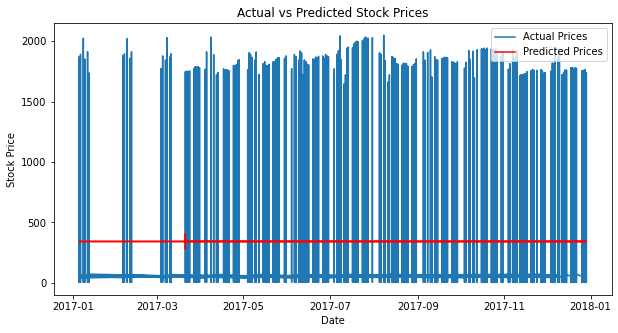

In [19]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(test.index, test.values, label='Actual Prices')
plt.plot(test.index, predictions, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()